# PRML 1.1 多項式フィッティングをやってみる

## 参考
- http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf
- https://qiita.com/koba-jon/items/a4d915ec5cb0f13c8e1e
- https://qiita.com/koba-jon/items/49990d306b53462383c4
- https://tech.preferred.jp/ja/blog/polynomial-fitting/
- https://qiita.com/mashiro135/items/f8cb74b2ccd4e3b3de93

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## とりあえず適当なデータを生成

In [2]:
n = 10
x = np.linspace(0, 1, n)
y = np.sin(x * 2 * np.pi) + np.random.normal(0, 0.1, n)

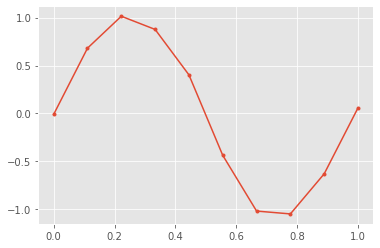

In [3]:
plt.plot(x, y, marker='.')

## フィッティングしてみる

In [4]:
def fitting(x, y, m):
    A = np.ndarray((len(x), m))
    for i in range(m):
        A[:, i] = x**i
    w = np.linalg.solve(A.T @ A, A.T @ y.T)
    return w

In [5]:
def f(x, w):
    y = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(w)):
            y[i] += w[j] * x[i]**j
    return y

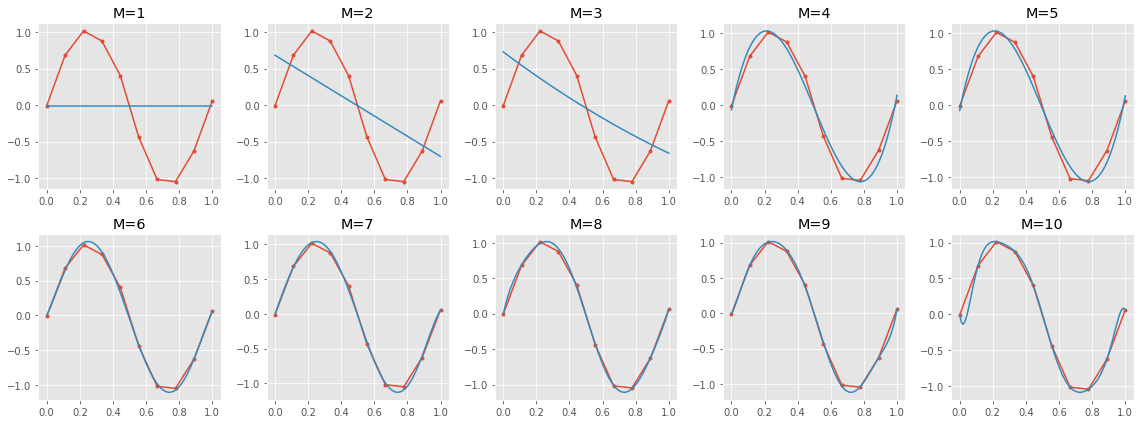

In [6]:
plt.figure(figsize=(16, 6))
for m in range(1, 11):
    w = fitting(x, y, m)
    x_est = np.linspace(0, 1, 100)
    y_est = f(x_est, w)
    plt.subplot(2, 5, m)
    plt.title('M={}'.format(m))
    plt.plot(x, y, marker='.')
    plt.plot(x_est, y_est)
plt.tight_layout()
plt.show()

## 正則化項を加えてオーバーフィッティングを防止してみる

In [7]:
def fitting2(x, y, l, m):
    A = np.ndarray((len(x), m))
    for i in range(m):
        A[:, i] = x**i
    w = np.linalg.solve(A.T @ A + l*np.eye(m), A.T @ y.T)
    return w

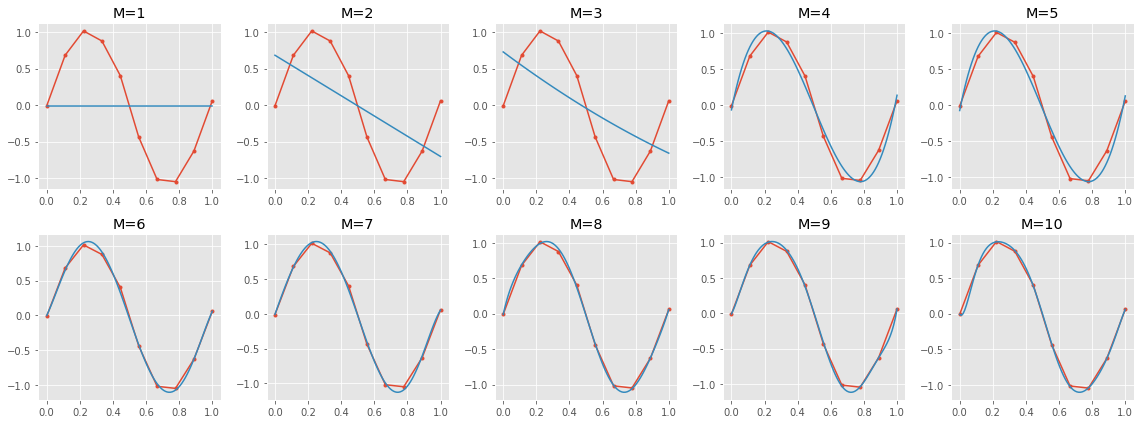

In [16]:
plt.figure(figsize=(16, 6))
for m in range(1, 11):
    w = fitting2(x, y, 0.0000000000001, m)
    x_est = np.linspace(0, 1, 100)
    y_est = f(x_est, w)
    plt.subplot(2, 5, m)
    plt.title('M={}'.format(m))
    plt.plot(x, y, marker='.')
    plt.plot(x_est, y_est)
plt.tight_layout()
plt.show()